In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dataset_train = pd.read_csv(r'C:\Users\admin\Desktop\Google_Stock_Price_Train.csv')
train_set = dataset_train.iloc[:, 1:2].values

In [18]:
train_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [19]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(train_set)


In [20]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [22]:
regressor = Sequential()

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [27]:
regressor.add(Dense(units = 1))

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0477
Epoch 2/10
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0066
Epoch 3/10
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0056
Epoch 4/10
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0056
Epoch 5/10
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0054
Epoch 6/10
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0054
Epoch 7/10
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0049
Epoch 8/10
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0047
Epoch 9/10
1198/1198 [==============================] - 12s 10ms/step - loss: 0.0045
Epoch 10/10
1198/1198 [==============================] - 13s 11ms/step - loss: 0.0048


In [32]:
dataset_test = pd.read_csv(r'C:\Users\admin\Desktop\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

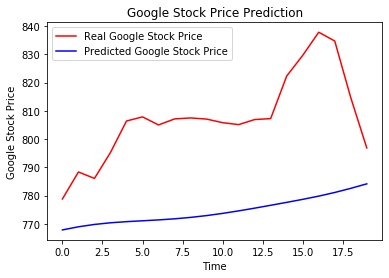

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
